In [192]:
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.utils import resample
import seaborn as sns 

# Linear Regression 



MSE:[0.028502858115530973, 0.021142027295126285, 0.00814787278990169, 0.005129419171715075, 0.0032285569405219525]
R2_score:[0.6646880085667284, 0.7512819505141997, 0.904147175695401, 0.9396567266906264, 0.9620187613188083]
Beta:[array([ 2.62999356, -0.13908643, -0.19010052]), array([ 2.67788413e+00, -1.38817892e-01, -1.93005361e-01,  1.62489995e-03,
        6.80511790e-02, -5.14577320e-02]), array([ 2.67019425e+00, -1.70838272e-01, -4.02088268e-01,  2.27346441e-03,
        6.44964733e-02, -3.86115229e-02,  3.62820860e-02,  1.50943523e-02,
       -3.19505749e-02,  1.05983770e-01]), array([ 2.59666413e+00, -1.70878368e-01, -4.11206107e-01,  2.07538331e-01,
        1.66641481e-01, -7.18476004e-03,  3.47127374e-02,  1.59566930e-02,
       -3.11922250e-02,  1.10486503e-01, -7.95062338e-02, -4.06161310e-02,
       -8.99396168e-04, -1.55172618e-02, -1.03005926e-02]), array([ 2.59135896, -0.1382454 , -0.46513455,  0.20771203,  0.16346499,
        0.0125617 ,  0.05734047, -0.06275168, -0.15494

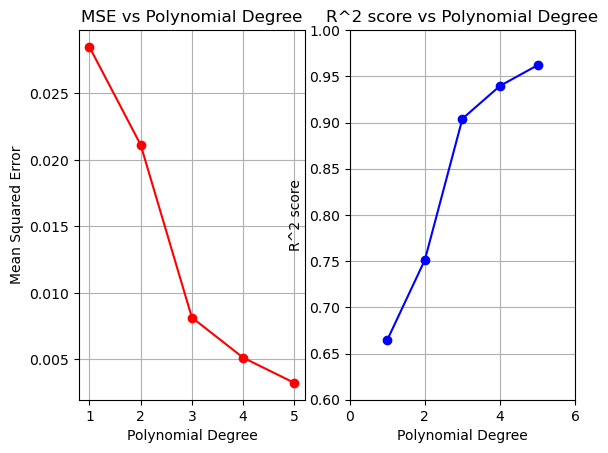

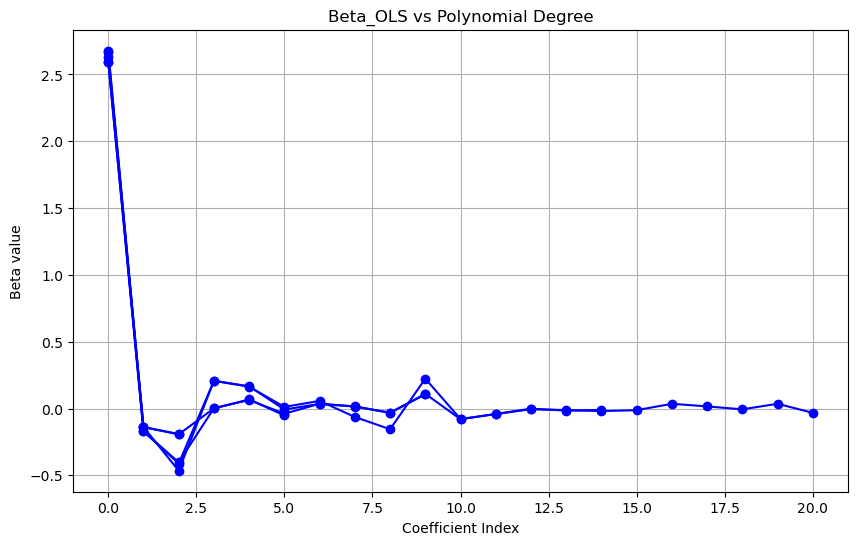

In [1]:
#1a
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


f_values = FrankeFunction(x,y)
noise = np.random.normal(0,1)
#Adding stochastic Noise with frank function
f_noisy = f_values + noise 
noise = f_noisy.ravel()

#Splitting data intop tran
x = x.ravel()
y = y.ravel()
X = np.column_stack((x,y))
X_train, X_test, y_train, y_test = train_test_split(X, noise, test_size = 0.2, random_state = 42)

#Scaling the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Creating Arrays to accumalate the calculated metrics
mse = []
r2score = []
Beta = []

#OLS on polynomials upto 5th order
Max_degree  = 5

for degree in range(1, Max_degree+1):
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(scaled_X_train)
    X_test_poly = poly.transform(scaled_X_test)
    #Fitting Linear regression model
    beta = np.linalg.pinv((X_train_poly).T @ X_train_poly) @ (X_train_poly).T @ y_train
    #linreg = LinearRegression()
    y_tilde = X_train_poly @ beta
    ypred = X_test_poly @ beta
    
    #Computing Mse AND R2 score
    mse.append(mean_squared_error(y_test, ypred))
    r2score.append(r2_score(y_test, ypred))
    Beta.append(beta)

degrees = range(1, Max_degree+1)

print(f'MSE:{mse}')
#Plot for MSE vs Polynomial Degrees
plt.subplot(1,2,1)
plt.plot(degrees, mse, marker ='o',color = 'r' ,label = 'MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.title("MSE vs Polynomial Degree")

print(f'R2_score:{r2score}')
#Plot for R^2score vs Polynomial Degrees
plt.subplot(1,2,2)
plt.plot(degrees, r2score, marker ='o',color = 'b' ,label = 'R^2 score')
plt.xlabel('Polynomial Degree')
plt.ylabel('R^2 score')
plt.xlim(0,6)
plt.ylim(0.6,1)
plt.grid()
plt.title("R^2 score vs Polynomial Degree")

print(f'Beta:{Beta}')
plt.figure(figsize=(1,6))
for i, beta in enumerate(Beta, degree):
    plt.plot(beta, marker ='o', color = 'b', label = f'Degree{i}')
plt.xlabel('Coefficient Index')
plt.ylabel('Beta value')
plt.title("Beta OLS vs Polynomial Degree")
plt.grid()
plt.legend
plt.show()


# Ridge Regression

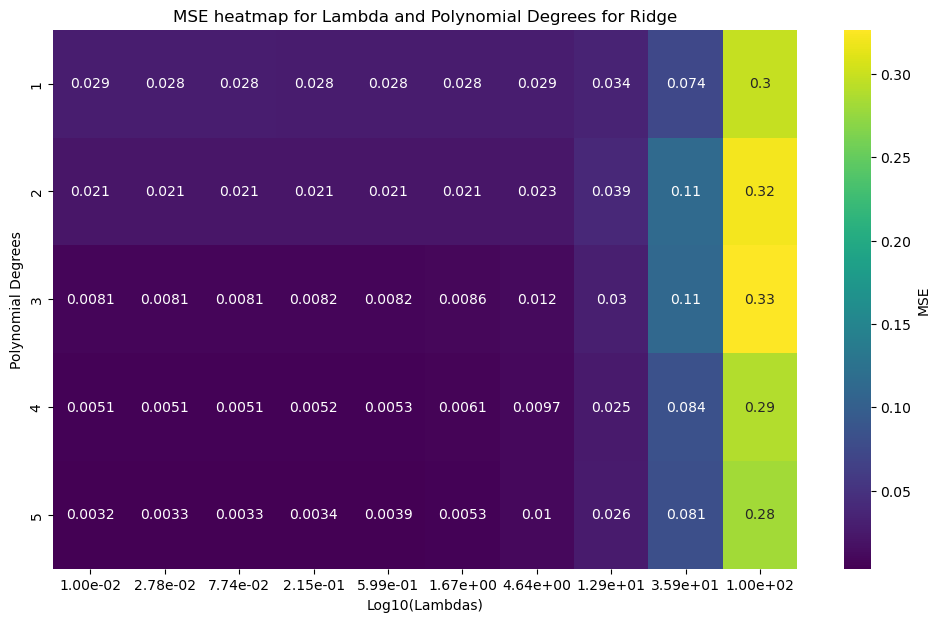

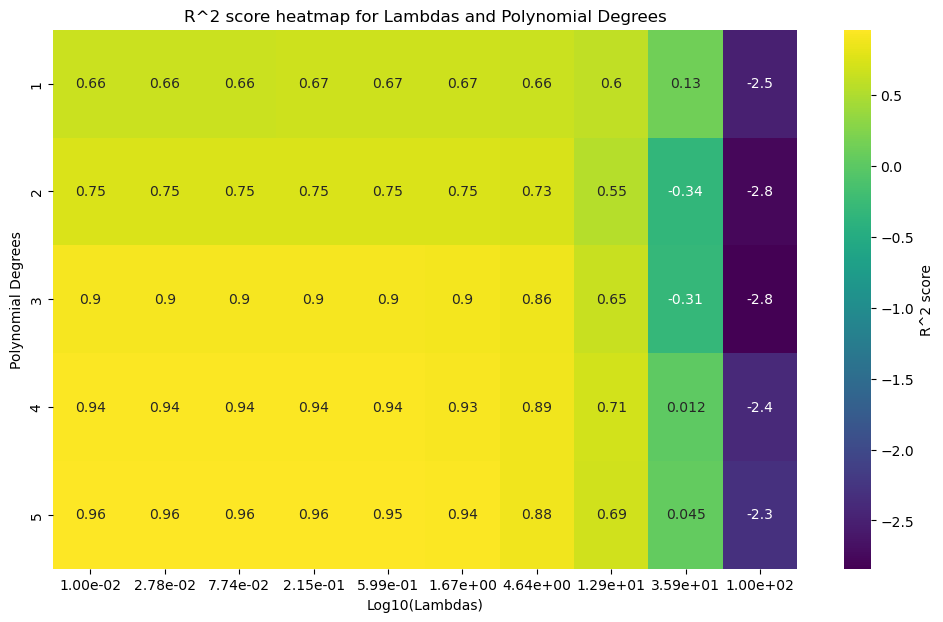

In [229]:
import numpy as np 
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
np.random.seed(0)
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

f_values = FrankeFunction(x,y)
noise = np.random.normal(0,1)

#Adding stochastic Noise with frank function
f_noisy = f_values + noise 
noise = f_noisy.ravel()

#Splitting data into train and test data 
x = x.ravel()
y = y.ravel()
X = np.column_stack((x,y))
X_train, X_test, y_train, y_test = train_test_split(X, noise, test_size = 0.2, random_state = 42)

#Scaling the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Max_degree = 5
nlambdas = 10
lambdas = np.logspace(-2,2,nlambdas)

MSE_Ridge = np.zeros((Max_degree, nlambdas)) #Storing MSE Values
R2score_Ridge = np.zeros((Max_degree, nlambdas)) #Storing R^2 values

degrees = range(1, Max_degree+1) 
for degree in degrees:
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(scaled_X_train)
    X_test_poly = poly.transform(scaled_X_test)
    
    for i, lmb in enumerate(lambdas):
        ridge = linear_model.Ridge(alpha = lmb, fit_intercept = False)
        ytilde = ridge.fit(X_train_poly, y_train)
        ypred = ridge.predict(X_test_poly)
        
#Storing MSE and R^2 for current degree
        MSE_Ridge[degree-1, i] = mean_squared_error(y_test, ypred)
        R2score_Ridge[degree -1,i] = r2_score(y_test, ypred)
    
#HeatMap for MSE
plt.figure(figsize =(12,7))
df_MSE_Ridge = pd.DataFrame(MSE_Ridge, index = degrees, columns =[f'{lmb:.2e}' for lmb in lambdas]) 
sns.heatmap(df_MSE_Ridge, annot=True, cmap="viridis", cbar_kws={'label': 'MSE'})     
plt.xlabel('Log10(Lambdas)')
plt.ylabel('Polynomial Degrees')
plt.title('MSE heatmap for Lambda and Polynomial Degrees for Ridge')
plt.show()

#HeatMap for R^2 score 
plt.figure(figsize =(12,7))
df_R2_score = pd.DataFrame(R2score_Ridge, index = degrees, columns= [f'{lmb:.2e}' for lmb in lambdas])
sns.heatmap(df_R2_score, annot = True, cmap = 'viridis', cbar_kws ={'label': 'R^2 score'})
plt.xlabel('Log10(Lambdas)')
plt.ylabel('Polynomial Degrees')
plt.title('R^2 score heatmap for Lambdas and Polynomial Degrees')
plt.show()
    


# Lasso Regression

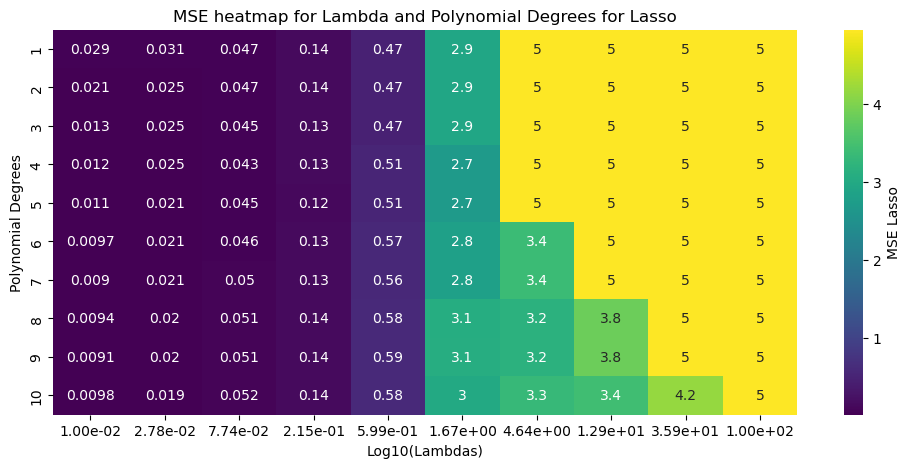

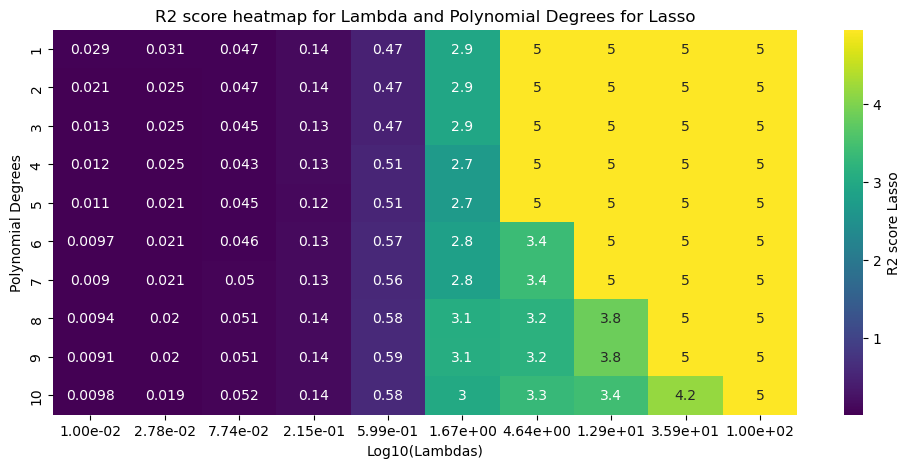

"        \n\nplt.figure(figsize=(12,6))\nfor i,lmb in enumerate(lambdas):\n    plt.plot(np.arange(1,Max_degree+1), R2_score_Lasso[:,i], marker ='o', label = f'Lambda = {lmb:.2e}')\nplt.xlabel('Polynomial Degrees')\nplt.ylabel('R2_score')\nplt.grid()\nplt.title('R2score vs Polynomial Degrees')\nplt.ylim([-1,1])\nplt.legend(bbox_to_anchor =(1.05,1), ncol =2)\nplt.show()\n"

In [204]:
np.random.seed(0)

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

f_values = FrankeFunction(x,y)
noise = np.random.normal(0,1)

#Adding stochastic Noise with frank function
f_noisy = f_values + noise 
noise = f_noisy.ravel()

#Splitting data into train and test data 
x = x.ravel()
y = y.ravel()
X = np.column_stack((x,y))
X_train, X_test, y_train, y_test = train_test_split(X, noise, test_size = 0.2, random_state = 42)

#Scaling the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Max_degree = 10
nlambdas = 10
lambdas = np.logspace(-2,2,nlambdas)

#Storing MSE and R^2 score
MSE_Lasso = np.zeros((Max_degree,nlambdas))#Storing MSE values
R2_score_Lasso = np.zeros((Max_degree, nlambdas)) #Storing R^2 Scores

degrees = range(1, Max_degree+1) 
for degree in degrees:
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(scaled_X_train)
    X_test_poly = poly.transform(scaled_X_test)
    
    for i,lmb in enumerate(lambdas):
        lasso = linear_model.Lasso(alpha = lmb, fit_intercept = False, max_iter = 10000)
        ytilde = lasso.fit(X_train_poly, y_train)
        ypred = lasso.predict(X_test_poly)  
        
# Storing MSE and R2_score for test data
        MSE_Lasso[degree-1, i] = mean_squared_error(y_test, ypred)
        R2_score_Lasso[degree-1, i] = r2_score(y_test, ypred)

#Heatmap for Lasso MSE
plt.figure(figsize=(12,5))
df_lasso_mse = pd.DataFrame(MSE_Lasso, index = degrees, columns =[f'{lmb:.2e}' for lmb in lambdas])
sns.heatmap(df_lasso_mse, annot = True, cmap = 'viridis', cbar_kws ={'label': 'MSE Lasso'})
plt.xlabel('Log10(Lambdas)')
plt.ylabel('Polynomial Degrees')
plt.title('MSE heatmap for Lambda and Polynomial Degrees for Lasso')
plt.show()

#Heatmap for R^2 score 
plt.figure(figsize=(12,5))
df_lasso_R2_score = pd.DataFrame(R2_score_Lasso, index = degrees, columns =[f'{lmb:.2e}' for lmb in lambdas])
sns.heatmap(df_lasso_mse, annot = True, cmap = 'viridis', cbar_kws ={'label': 'R2 score Lasso'})
plt.xlabel('Log10(Lambdas)')
plt.ylabel('Polynomial Degrees')
plt.title('R2 score heatmap for Lambda and Polynomial Degrees for Lasso')
plt.show()


# Bias-Variance trade-off and resampling of OLS


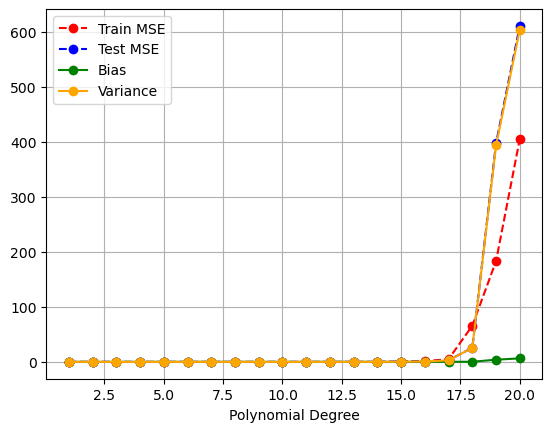

In [252]:
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.utils import resample
np.random.seed(0)


# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


f_values = FrankeFunction(x,y)
noise = np.random.normal(0,1)
#Adding stochastic Noise with frank function
f_noisy = f_values + noise 
noise = f_noisy.ravel()

#Splitting data intop tran
x = x.ravel()
y = y.ravel()
X = np.column_stack((x,y))
X_train, X_test, y_train, y_test = train_test_split(X, noise, test_size = 0.2, random_state = 42)


#Scaling the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#OLS on polynomials upto 5th order
Max_degree = 20
n = 50
n_bootstrap = 100

#Creating Arrays to accumalate the calculated metrics
MSE = np.zeros(Max_degree)
bias = np.zeros(Max_degree)
variance = np.zeros(Max_degree)
train_MSE = np.zeros(Max_degree)
test_MSE = np.zeros(Max_degree)

for degree in range(1, Max_degree+1):
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(scaled_X_train)
    X_test_poly = poly.transform(scaled_X_test)
    train_MSE[degree-1] = 0
    test_MSE[degree-1] = 0
    linreg = LinearRegression(fit_intercept = False) #From lecture note Resampling notes
    y_pred_train = np.empty((y_train.shape[0], n_bootstrap)) #From lecture note Resampling notes
    y_pred_test = np.empty((y_test.shape[0], n_bootstrap)) #From lecture note Resampling notes
    
    for i in range(n_bootstrap): #From lecture note Resampling notes
        x_,y_ = resample(X_train_poly, y_train) #From lecture note Resampling notes
        #Evaluating the new model on the same test data
        linreg.fit(x_,y_)
        y_pred_train[:,i] = linreg.predict(X_train_poly).ravel() #From lecture note Resampling notes
        y_pred_test[:, i] = linreg.predict(X_test_poly).ravel() #From lecture note Resampling notes
    
    #Calculating MSE for each bootstrap and summing up each MSE
        train_MSE[degree-1] += mean_squared_error(y_train, y_pred_train[:,i]) #From lecture note Resampling notes
        test_MSE[degree-1] += mean_squared_error(y_test, y_pred_test[:,i]) #From lecture note Resampling notes
        
    train_MSE[degree-1] /= n_bootstrap  #From lecture note Resampling notes
    test_MSE[degree-1] /=n_bootstrap #From lecture note Resampling notes

    y_pred_test_mean = np.mean(y_pred_test, axis = 1, keepdims = True) #From lecture note Resampling notes
    #Calculating bias and variance
    bias[degree-1]= np.mean((y_test - y_pred_test_mean)**2) #From lecture note Resampling notes
    variance[degree-1]= np.mean(np.var(y_pred_test, axis = 1))#From lecture note Resampling notes
    
#Plotting the train and test MSE    
plt.plot(np.arange(1,Max_degree+1), train_MSE, marker = 'o',color ='r', linestyle = 'dashed',label = 'Train MSE')
plt.plot(np.arange(1,Max_degree+1), test_MSE, marker = 'o', color = 'b',linestyle = 'dashed',label = 'Test MSE')

#Plotting bias and variance
plt.plot(np.arange(1,Max_degree+1), bias, marker = 'o', color ='g',label = 'Bias')
plt.plot(np.arange(1,Max_degree+1), variance, marker = 'o',color = 'orange', label = 'Variance')
plt.xlabel('Polynomial Degree')
plt.grid()
plt.legend()
plt.show()



# Cross-validation as resampling techniques, adding more complexity

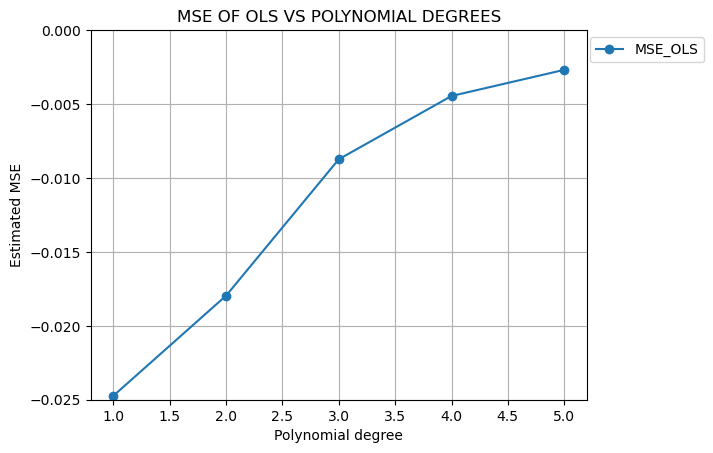

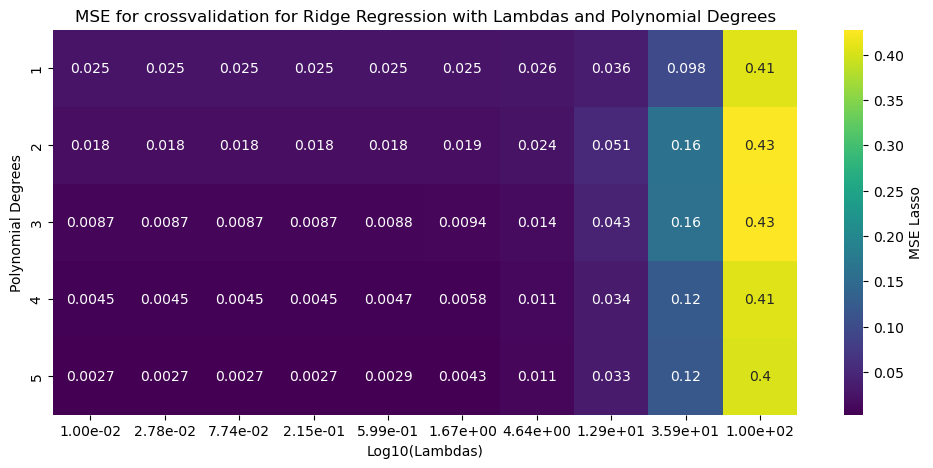

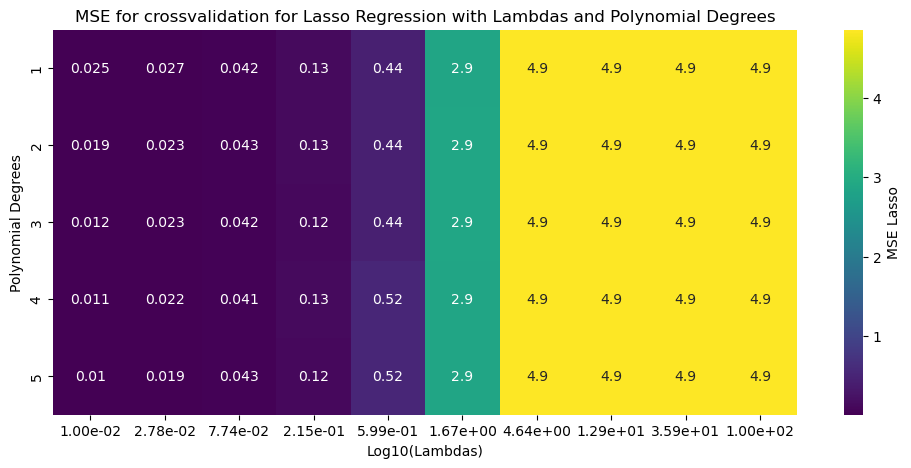

In [241]:
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score, KFold
np.random.seed(0)


# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


f_values = FrankeFunction(x,y)
noise = np.random.normal(0,1)
#Adding stochastic Noise with frank function
f_noisy = f_values + noise 
noise = f_noisy.ravel()

#Splitting data intop tran
x = x.ravel()
y = y.ravel()
X = np.column_stack((x,y))
X_train, X_test, y_train, y_test = train_test_split(X, noise, test_size = 0.2, random_state = 42)

#Scaling the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Initializing Max degree
Max_degree = 5
#K and k_folds
k = 5
kfold = KFold(n_splits = k)

#Lambda values
nlambdas = 10
lambdas = np.logspace(-2,2,nlambdas)

#Arrays tp store the results

estimated_MSE_OLS = np.zeros(Max_degree)
estimated_MSE_Ridge = np.zeros((Max_degree, nlambdas))
estimated_MSE_Lasso = np.zeros((Max_degree, nlambdas))

degrees = range(1, Max_degree+1)
for degree in range(1, Max_degree+1):
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(scaled_X_train)
    X_test_poly = poly.transform(scaled_X_test)
    linreg = LinearRegression(fit_intercept = False)

    #Cross-validation to estimate MSE for OLS
    mse_folds_OLS = cross_val_score(linreg, X_train_poly, y_train, scoring = 'neg_mean_squared_error', cv = kfold) #from 
    estimated_MSE_OLS[degree-1] = np.mean(mse_folds_OLS)
        
    for lmb_idx, lmb in enumerate(lambdas):
        ridge = linear_model.Ridge(alpha = lmb,fit_intercept = False)
        lasso = linear_model.Lasso(alpha = lmb, fit_intercept = False, max_iter = 100000)
        #Cross-validation to estimate MSE for Ridge
        mse_folds_ridge = cross_val_score(ridge, X_train_poly, y_train, scoring = 'neg_mean_squared_error', cv= kfold)
        #Cross-validation to estimate MSE for Lasso
        mse_folds_lasso = cross_val_score(lasso, X_train_poly, y_train, scoring = 'neg_mean_squared_error', cv =kfold)
        
        estimated_MSE_Ridge[degree-1, lmb_idx] = np.mean(-mse_folds_ridge)
        estimated_MSE_Lasso[degree-1, lmb_idx] = np.mean(-mse_folds_lasso)
        
        
#Plot for OLS
plt.plot(np.arange(1, Max_degree+1), estimated_MSE_OLS, marker = 'o', label = 'MSE_OLS')
plt.xlabel('Polynomial degree')
plt.ylabel('Estimated MSE')
plt.ylim([-0.025,0])
plt.title('MSE OF OLS VS POLYNOMIAL DEGREES')
plt.grid()
plt.legend(bbox_to_anchor=(1.25,1), ncol = 2)

#Heatmap for Ridge
plt.figure(figsize=(12,5))
df_ridge_mse = pd.DataFrame(estimated_MSE_Ridge, index = degrees, columns =[f'{lmb:.2e}' for lmb in lambdas])
sns.heatmap(df_ridge_mse, annot = True, cmap = 'viridis', cbar_kws ={'label': 'MSE Lasso'})
plt.xlabel('Log10(Lambdas)')
plt.ylabel('Polynomial Degrees')
plt.title('MSE for crossvalidation for Ridge Regression with Lambdas and Polynomial Degrees')
plt.show()

#Heatmap for Lasso
plt.figure(figsize=(12,5))
df_lasso_mse = pd.DataFrame(estimated_MSE_Lasso, index = degrees, columns =[f'{lmb:.2e}' for lmb in lambdas])
sns.heatmap(df_lasso_mse, annot = True, cmap = 'viridis', cbar_kws ={'label': 'MSE Lasso'})
plt.xlabel('Log10(Lambdas)')
plt.ylabel('Polynomial Degrees')
plt.title('MSE for crossvalidation for Lasso Regression with Lambdas and Polynomial Degrees')
plt.show()


# Analysis of Real Data

C:\Users\shado\AppData\Local\Temp\ipykernel_24428\3766217606.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain1 = imread('SRTM_data_Norway_1.tif')


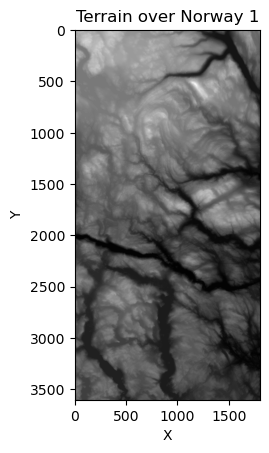

"\nterrain_new= terrain1[1000:1200,500:700 ]\nrows, cols = terrain_new.shape\nx = np.arange(0,cols)\ny = np.arange(0, rows)\nx,y = np.meshgrid(x,y)\n\nx = x.flatten()\ny = y.flatten()\nz = terrain_new.flatten() #Response variable\n\nX = np.column_stack((x,y))\n#Splitting Data into Train, Test\nX_train, X_test, y_train, y_test = train_test_split(X, z, test_size = 0.2, random_state = 42)\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\n#Lambda values\nnlambdas = 10\nlambdas = np.logspace(-4,4,nlambdas)\n\n#K and Kfold for Cross Validation\nk = 10\nkfold = KFold(n_splits = k)\n\n#Polynomial Degree\nMax_degree = 10\n\n#Creating arrays for storing values\nestimated_MSE_OLS = np.zeros(Max_degree)\nestimated_MSE_Ridge = np.zeros((Max_degree, nlambdas))\nestimated_MSE_Lasso = np.zeros((Max_degree, nlambdas))\n\ndegrees = range(1, Max_degree+1)\n\nfor degree in degrees:\n    #Creating arrays for storing values\n    polynomia

In [250]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score, KFold
np.random.seed(0)

 # Load the terrain
terrain1 = imread('SRTM_data_Norway_1.tif')
 # Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

"""
terrain_new= terrain1[1000:1200,500:700 ]
rows, cols = terrain_new.shape
x = np.arange(0,cols)
y = np.arange(0, rows)
x,y = np.meshgrid(x,y)

x = x.flatten()
y = y.flatten()
z = terrain_new.flatten() #Response variable

X = np.column_stack((x,y))
#Splitting Data into Train, Test
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Lambda values
nlambdas = 10
lambdas = np.logspace(-4,4,nlambdas)

#K and Kfold for Cross Validation
k = 10
kfold = KFold(n_splits = k)

#Polynomial Degree
Max_degree = 10

#Creating arrays for storing values
estimated_MSE_OLS = np.zeros(Max_degree)
estimated_MSE_Ridge = np.zeros((Max_degree, nlambdas))
estimated_MSE_Lasso = np.zeros((Max_degree, nlambdas))

degrees = range(1, Max_degree+1)

for degree in degrees:
    #Creating arrays for storing values
    polynomial = np.zeros(Max_degree)
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    #Cross-Validating for OLS
    linreg = LinearRegression(fit_intercept = False)
    MSE_folds_ols = cross_val_score(linreg, X_train_poly, y_train, scoring = 'neg_mean_squared_error', cv = kfold)
    polynomial[degree-1] = degree
    estimated_MSE_OLS[degree-1] = np.mean(-MSE_folds_ols)
    
    #Cross-validation for Ridge and Lasso
    for i, lmb in enumerate(lambdas):
        ridge = linear_model.Ridge(alpha = lmb,fit_intercept = False)
        lasso = linear_model.Lasso(alpha = lmb, fit_intercept = False, max_iter = 100000)
        #Cross-validation to estimate MSE for Ridge
        mse_folds_ridge = cross_val_score(ridge, X_train_poly, y_train, scoring = 'neg_mean_squared_error', cv= kfold)
        #Cross-validation to estimate MSE for Lasso
        mse_folds_lasso = cross_val_score(lasso, X_train_poly, y_train, scoring = 'neg_mean_squared_error', cv =kfold)
        
        estimated_MSE_Ridge[degree-1, i] = np.mean(-mse_folds_ridge)
        estimated_MSE_Lasso[degree-1, i] = np.mean(-mse_folds_lasso)

        
#Plotting for OLS
plt.plot(np.arange(1,Max_degree+1), np.log10(estimated_MSE_OLS), marker = 'o', label = 'MSE_OLS')
plt.xlabel('Polynomial degree')
plt.ylabel('Estimated MSE')
plt.title('MSE OF OLS VS POLYNOMIAL DEGREES')
plt.grid()
plt.legend()
plt.show()

#HeatMap for Ridge
plt.figure(figsize=(12,5))
df_ridge_mse = pd.DataFrame(np.log10(estimated_MSE_Ridge), index = degrees, columns =[f'{lmb:.2e}' for lmb in lambdas])
sns.heatmap(df_ridge_mse, annot = True, cmap = 'viridis', cbar_kws ={'label': 'MSE Lasso'})
plt.xlabel('Log10(Lambdas)')
plt.ylabel('Polynomial Degrees')
plt.title('MSE for crossvalidation for Ridge Regression with Lambdas and Polynomial Degrees')
plt.show()

#HeatMap for Lasso
plt.figure(figsize=(12,5))
df_lasso_mse = pd.DataFrame(np.log10(estimated_MSE_Lasso), index = degrees, columns =[f'{lmb:.2e}' for lmb in lambdas])
sns.heatmap(df_lasso_mse, annot = True, cmap = 'viridis', cbar_kws ={'label': 'MSE Lasso'})
plt.xlabel('Log10(Lambdas)')
plt.ylabel('Polynomial Degrees')
plt.title('MSE for crossvalidation for Lasso Regression with Lambdas and Polynomial Degrees')
plt.show()
"""